Pusula Data Science Intern Case Study - Sena YAMAN

In [2284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2285]:
df = pd.read_excel("C:/Users/BEN/Desktop/Pusula_Case/Talent_Academy_Case_DT_2025.xlsx")

In [2286]:
dfCopy = df.copy()

In [2287]:
def veri_seti_ozeti(df):
   
    print("===== Veri Seti Boyutu =====")
    print(f"Satır sayısı: {df.shape[0]}")
    print(f"Sütun sayısı: {df.shape[1]}\n")
    
    print("===== Sütunlar ve Veri Tipleri =====")
    print(df.dtypes, "\n")
    
    print("===== Eksik Değerler =====")
    eksik = df.isnull().sum()
    eksik_yuzde = (eksik / len(df)) * 100
    print(pd.DataFrame({"Eksik Sayısı": eksik, "Yüzde": eksik_yuzde}), "\n")
    
    print("===== Temel İstatistikler (Sayısal) =====")
    print(df.describe(), "\n")
    
    print("===== Temel İstatistikler (Kategorik) =====")
    print(df.describe(include='object'), "\n")


In [2288]:
veri_seti_ozeti(df)

===== Veri Seti Boyutu =====
Satır sayısı: 2235
Sütun sayısı: 13

===== Sütunlar ve Veri Tipleri =====
HastaNo             int64
Yas                 int64
Cinsiyet           object
KanGrubu           object
Uyruk              object
KronikHastalik     object
Bolum              object
Alerji             object
Tanilar            object
TedaviAdi          object
TedaviSuresi       object
UygulamaYerleri    object
UygulamaSuresi     object
dtype: object 

===== Eksik Değerler =====
                 Eksik Sayısı      Yüzde
HastaNo                     0   0.000000
Yas                         0   0.000000
Cinsiyet                  169   7.561521
KanGrubu                  675  30.201342
Uyruk                       0   0.000000
KronikHastalik            611  27.337808
Bolum                      11   0.492170
Alerji                    944  42.237136
Tanilar                    75   3.355705
TedaviAdi                   0   0.000000
TedaviSuresi                0   0.000000
UygulamaYerleri         

In [2289]:
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [2290]:
import pandas as pd

def unique_degerler(df):
   
    unique_info = {}
    
    for col in df.columns:
        try:
            benzersiz = df[col].dropna().unique()
            unique_info[col] = {
                "Unique Sayısı": df[col].nunique(),
                "Tüm Unique Değerler": benzersiz
            }
        except Exception as e:
            unique_info[col] = {
                "Unique Sayısı": "Hesaplanamadı",
                "Tüm Unique Değerler": str(e)
            }
    
    sonuc = pd.DataFrame(unique_info).T
    return sonuc


In [2291]:
unique_degerler(df)


,Unique Sayısı,Tüm Unique Değerler
HastaNo,404,"[145134, 145135, 145136, 145137, 145138, 14513..."
Yas,75,"[60, 28, 65, 61, 52, 48, 46, 92, 59, 72, 77, 6..."
Cinsiyet,2,"[Kadın, Erkek]"
KanGrubu,8,"[0 Rh+, A Rh+, B Rh+, B Rh-, AB Rh+, A Rh-, 0 ..."
Uyruk,5,"[Türkiye, Tokelau, Azerbaycan, Libya, Arnavutluk]"
KronikHastalik,220,"[Becker Musküler Distrofisi, Hiportiroidizm, K..."
Bolum,10,"[Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkez..."
Alerji,38,"[TOZ, POLEN,NOVALGIN, NOVALGIN, Polen, Toz, Po..."
Tanilar,367,"[Ayak bileği ve ayağın yüzeysel yaralanması, O..."
TedaviAdi,244,"[Ayak Bileği, Dorsalji -Boyun+trapez+skapular,..."


In [2292]:
# Tekrarlayan verileri temizleme
df = df.drop_duplicates()

In [2293]:
df.shape

(1307, 13)

In [2294]:
df.isnull().sum()

HastaNo              0
Yas                  0
Cinsiyet           104
KanGrubu           365
Uyruk                0
KronikHastalik     345
Bolum                7
Alerji             540
Tanilar             46
TedaviAdi            0
TedaviSuresi         0
UygulamaYerleri    157
UygulamaSuresi       0
dtype: int64

In [2295]:
df["Cinsiyet"] = df["Cinsiyet"].fillna(df["Cinsiyet"].mode()[0])
df["KanGrubu"] = df["KanGrubu"].fillna("Bilinmiyor")
df["KronikHastalik"] = df["KronikHastalik"].fillna("KronikHastalik")
df["Bolum"] = df["Bolum"].fillna(df["Bolum"].mode()[0])
df["Alerji"] = df["Alerji"].fillna("Bilinmiyor")
df["Tanilar"] = df["Tanilar"].fillna("Bilinmiyor")
df["UygulamaYerleri"] = df["UygulamaYerleri"].fillna("Bilinmiyor")

In [2296]:
df.isnull().sum()

HastaNo            0
Yas                0
Cinsiyet           0
KanGrubu           0
Uyruk              0
KronikHastalik     0
Bolum              0
Alerji             0
Tanilar            0
TedaviAdi          0
TedaviSuresi       0
UygulamaYerleri    0
UygulamaSuresi     0
dtype: int64

In [2297]:
import re

def metin_standartlastir(df):
  
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = (
            df[col]
            .astype(str)                         # NaN değerler için
            .str.strip()                         # baştaki ve sondaki boşlukları sil
            .str.lower()                         # küçük harfe çevir
            .apply(lambda x: re.sub(r'\s+', ' ', x))  # fazla boşlukları tek boşluk yap
        )
        # 'nan' string'lerini geri NaN yap
        df[col] = df[col].replace("nan", pd.NA)
    return df

In [2298]:
metin_standartlastir(df)

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,kadın,0 rh+,türkiye,"becker musküler distrofisi, hiportiroidizm, ka...","fiziksel tıp ve rehabilitasyon,solunum merkezi",toz,ayak bileği ve ayağın yüzeysel yaralanması,ayak bileği,5 seans,ayak bileği,20 dakika
1,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",bilinmiyor,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15 seans,boyun,20 dakika
2,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",bilinmiyor,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15 seans,"boyun,sırt",20 dakika
3,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",bilinmiyor,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15 seans,boyun,5 dakika
6,145136,60,erkek,0 rh+,türkiye,kronikhastalik,"fiziksel tıp ve rehabilitasyon,solunum merkezi","polen,novalgin",parapleji ve tetrapleji,parapleji,10 seans,bilinmiyor,30 dakika
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,145536,48,erkek,bilinmiyor,türkiye,"aritmi, myastenia gravis, fascioscapulohumeral...","fiziksel tıp ve rehabilitasyon,solunum merkezi","arveles,coraspin",eklemin kontraktürü,ekstansör tendon rehabilitasyon,15 seans,sol el bilek bölgesi,20 dakika
2230,145536,48,erkek,bilinmiyor,türkiye,"aritmi, myastenia gravis, fascioscapulohumeral...","fiziksel tıp ve rehabilitasyon,solunum merkezi","arveles,coraspin",eklemin kontraktürü,ekstansör tendon rehabilitasyon,15 seans,sol el bilek bölgesi,10 dakika
2232,145537,33,kadın,a rh+,türkiye,kronikhastalik,"fiziksel tıp ve rehabilitasyon,solunum merkezi",sucuk,"aşil tendon yaralanması,​algonörodistrofi,​ ay...",aşil rüptürü rehabilitasyonu,15 seans,sol ayak bileği bölgesi,20 dakika
2233,145537,33,kadın,a rh+,türkiye,kronikhastalik,"fiziksel tıp ve rehabilitasyon,solunum merkezi",sucuk,"aşil tendon yaralanması,algonörodistrofi, ayak...",aşil rüptürü rehabilitasyonu,15 seans,sol ayak bileği bölgesi,15 dakika


In [2299]:
df.isnull().sum()

HastaNo            0
Yas                0
Cinsiyet           0
KanGrubu           0
Uyruk              0
KronikHastalik     0
Bolum              0
Alerji             0
Tanilar            0
TedaviAdi          0
TedaviSuresi       0
UygulamaYerleri    0
UygulamaSuresi     0
dtype: int64

In [2300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          1307 non-null   int64 
 1   Yas              1307 non-null   int64 
 2   Cinsiyet         1307 non-null   object
 3   KanGrubu         1307 non-null   object
 4   Uyruk            1307 non-null   object
 5   KronikHastalik   1307 non-null   object
 6   Bolum            1307 non-null   object
 7   Alerji           1307 non-null   object
 8   Tanilar          1307 non-null   object
 9   TedaviAdi        1307 non-null   object
 10  TedaviSuresi     1307 non-null   object
 11  UygulamaYerleri  1307 non-null   object
 12  UygulamaSuresi   1307 non-null   object
dtypes: int64(2), object(11)
memory usage: 143.0+ KB


In [2301]:
df["TedaviSuresi"].unique()

array(['5 seans', '15 seans', '10 seans', '18 seans', '20 seans',
       '2 seans', '6 seans', '4 seans', '30 seans', '11 seans',
       '16 seans', '21 seans', '1 seans', '8 seans', '3 seans', '7 seans',
       '19 seans', '29 seans', '14 seans', '17 seans', '25 seans',
       '22 seans', '37 seans'], dtype=object)

In [2302]:
df["TedaviSuresi_num"] = df["TedaviSuresi"].str.extract(r'(\d+)').astype(int)

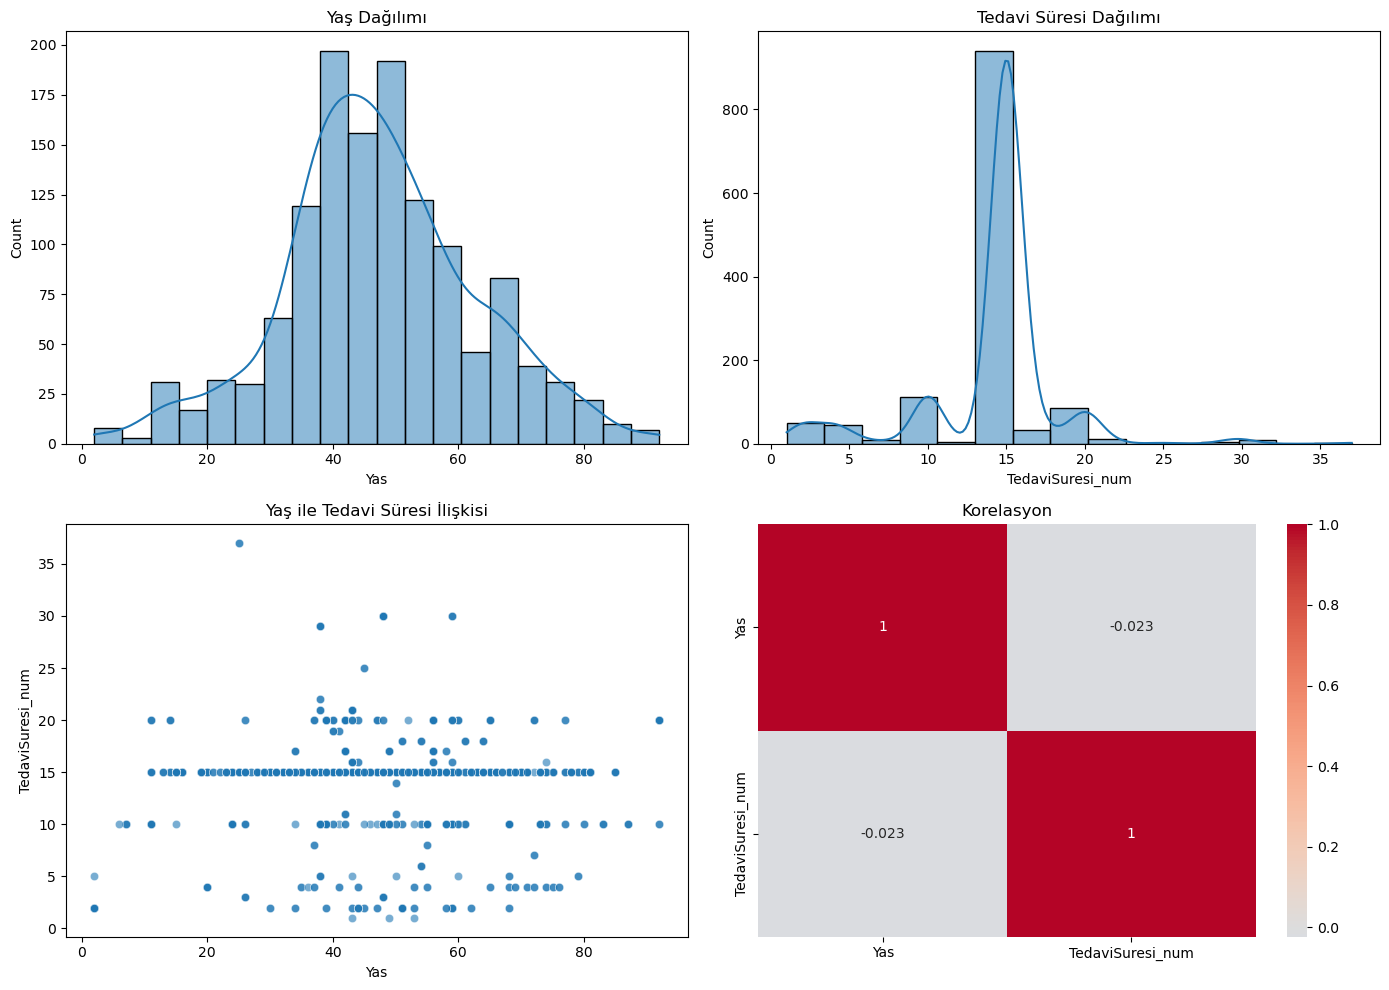

In [2303]:
plt.figure(figsize=(14,10))

#  Yaş dağılımı
plt.subplot(2,2,1)
sns.histplot(df["Yas"], bins=20, kde=True)
plt.title("Yaş Dağılımı")

# Tedavi süresi dağılımı
plt.subplot(2,2,2)
sns.histplot(df["TedaviSuresi_num"], bins=15, kde=True)
plt.title("Tedavi Süresi Dağılımı")

# Yaş - Tedavi süresi scatter
plt.subplot(2,2,3)
sns.scatterplot(x="Yas", y="TedaviSuresi_num", data=df, alpha=0.6)
plt.title("Yaş ile Tedavi Süresi İlişkisi")

# Korelasyon heatmap
plt.subplot(2,2,4)
sns.heatmap(df[["Yas", "TedaviSuresi_num"]].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Korelasyon")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Cinsiyet vs Tedavi Süresi')

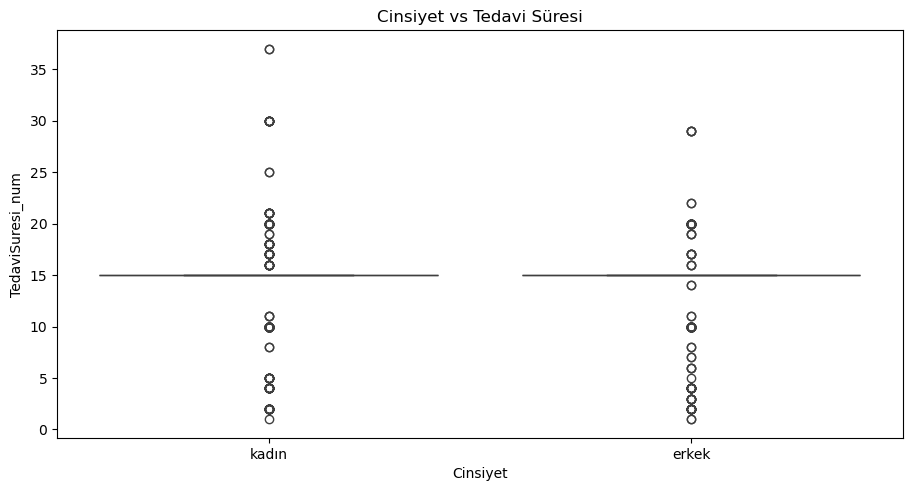

In [2304]:
plt.figure(figsize=(24,18)) 

# Cinsiyet - Tedavi Süresi
plt.subplot(3,2,1)
sns.boxplot(x="Cinsiyet", y="TedaviSuresi_num", data=df)
plt.title("Cinsiyet vs Tedavi Süresi")



Text(0.5, 1.0, 'Kan Grubu vs Tedavi Süresi')

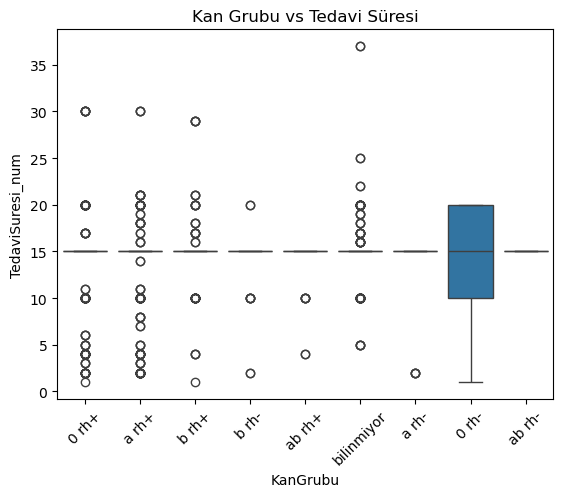

In [2305]:
# Kan Grubu - Tedavi Süresi

sns.boxplot(x="KanGrubu", y="TedaviSuresi_num", data=df)
plt.xticks(rotation=45)
plt.title("Kan Grubu vs Tedavi Süresi")

Text(0.5, 1.0, 'Uyruk vs Tedavi Süresi')

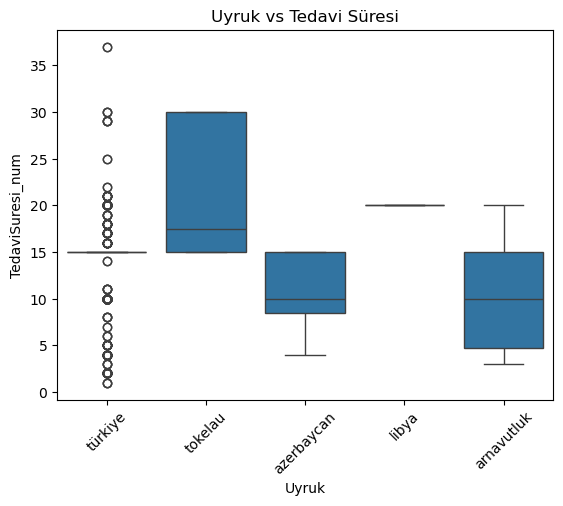

In [2306]:
# Uyruk - Tedavi Süresi


sns.boxplot(x="Uyruk", y="TedaviSuresi_num", data=df)
plt.xticks(rotation=45)
plt.title("Uyruk vs Tedavi Süresi")





Text(0.5, 1.0, 'Bölüm vs Ortalama Tedavi Süresi')

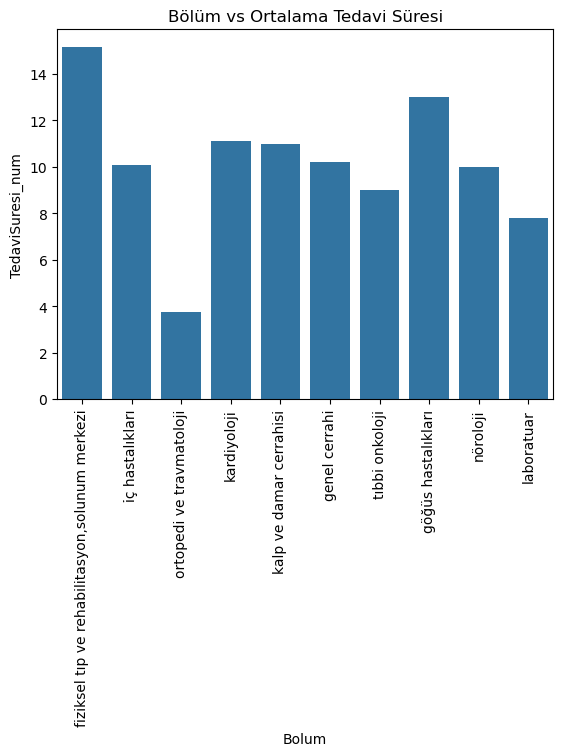

In [2307]:

# Bölüm - Tedavi Süresi

sns.barplot(x="Bolum", y="TedaviSuresi_num", data=df, estimator=np.mean, errorbar=None)
plt.xticks(rotation=90)
plt.title("Bölüm vs Ortalama Tedavi Süresi")

Text(0.5, 1.0, 'Alerji vs Tedavi Süresi')

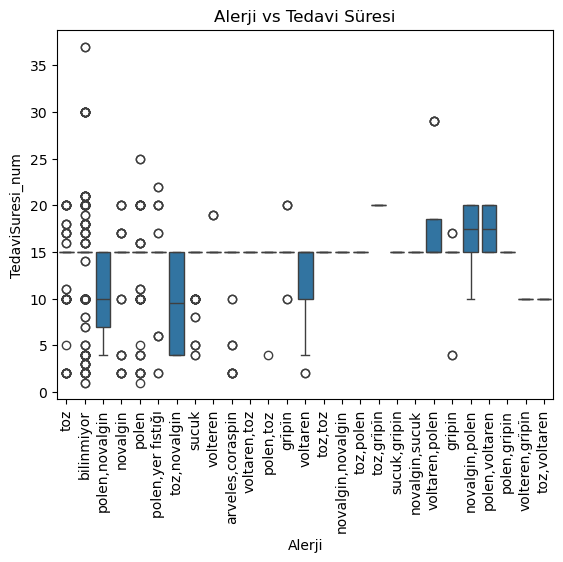

In [2308]:
# Alerji - Tedavi Süresi

sns.boxplot(x="Alerji", y="TedaviSuresi_num", data=df)
plt.xticks(rotation=90)
plt.title("Alerji vs Tedavi Süresi")



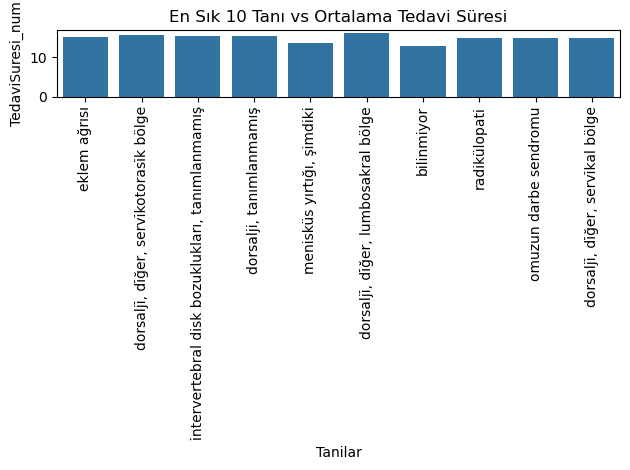

In [2309]:
# Tanılar - Tedavi Süresi

top_tanilar = df["Tanilar"].value_counts().nlargest(10).index
sns.barplot(x="Tanilar", y="TedaviSuresi_num", 
            data=df[df["Tanilar"].isin(top_tanilar)], estimator=np.mean, errorbar=None)
plt.xticks(rotation=90)
plt.title("En Sık 10 Tanı vs Ortalama Tedavi Süresi")

plt.tight_layout()
plt.show()

In [2310]:
categorical_cols = [
    "Cinsiyet", "KanGrubu", "Uyruk", "KronikHastalik", 
    "Bolum", "Alerji", "Tanilar", "TedaviAdi", "UygulamaYerleri"
]

In [2311]:
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,TedaviSuresi_num
0,145134,60,kadın,0 rh+,türkiye,"becker musküler distrofisi, hiportiroidizm, ka...","fiziksel tıp ve rehabilitasyon,solunum merkezi",toz,ayak bileği ve ayağın yüzeysel yaralanması,ayak bileği,5 seans,ayak bileği,20 dakika,5
1,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",bilinmiyor,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15 seans,boyun,20 dakika,15
2,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",bilinmiyor,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15 seans,"boyun,sırt",20 dakika,15
3,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",bilinmiyor,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15 seans,boyun,5 dakika,15
6,145136,60,erkek,0 rh+,türkiye,kronikhastalik,"fiziksel tıp ve rehabilitasyon,solunum merkezi","polen,novalgin",parapleji ve tetrapleji,parapleji,10 seans,bilinmiyor,30 dakika,10


In [2312]:
def kolon_unique_sayilari(df):
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} benzersiz değer")

# Kullanım:
kolon_unique_sayilari(df)


HastaNo: 404 benzersiz değer
Yas: 75 benzersiz değer
Cinsiyet: 2 benzersiz değer
KanGrubu: 9 benzersiz değer
Uyruk: 5 benzersiz değer
KronikHastalik: 221 benzersiz değer
Bolum: 10 benzersiz değer
Alerji: 27 benzersiz değer
Tanilar: 329 benzersiz değer
TedaviAdi: 238 benzersiz değer
TedaviSuresi: 23 benzersiz değer
UygulamaYerleri: 38 benzersiz değer
UygulamaSuresi: 10 benzersiz değer
TedaviSuresi_num: 23 benzersiz değer


In [2313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 2234
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   HastaNo           1307 non-null   int64 
 1   Yas               1307 non-null   int64 
 2   Cinsiyet          1307 non-null   object
 3   KanGrubu          1307 non-null   object
 4   Uyruk             1307 non-null   object
 5   KronikHastalik    1307 non-null   object
 6   Bolum             1307 non-null   object
 7   Alerji            1307 non-null   object
 8   Tanilar           1307 non-null   object
 9   TedaviAdi         1307 non-null   object
 10  TedaviSuresi      1307 non-null   object
 11  UygulamaYerleri   1307 non-null   object
 12  UygulamaSuresi    1307 non-null   object
 13  TedaviSuresi_num  1307 non-null   int32 
dtypes: int32(1), int64(2), object(11)
memory usage: 148.1+ KB


In [2314]:
# TedaviSuresi kolonundaki sayıları alıp yeni bir kolon oluştur
df["TedaviSuresi_num"] = pd.to_numeric(df["TedaviSuresi"].str.extract(r"(\d+)")[0])

# Ortalama değerini hesapla
ortalama_tedavi_suresi = df["TedaviSuresi_num"].mean()
print("Tedavi süresinin ortalaması:", ortalama_tedavi_suresi)

# İstersen eksik değerleri ortalama ile doldurabilirsin
df["TedaviSuresi_num"].fillna(ortalama_tedavi_suresi)

Tedavi süresinin ortalaması: 14.23106350420811


0        5
1       15
2       15
3       15
6       10
        ..
2228    15
2230    15
2232    15
2233    15
2234    15
Name: TedaviSuresi_num, Length: 1307, dtype: int64

In [2315]:
df = pd.get_dummies(df, columns=["Cinsiyet", "KanGrubu", "Uyruk", "Bolum","TedaviSuresi"], drop_first=True)

In [2316]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Alerji"] = le.fit_transform(df["Alerji"])
df["UygulamaYerleri"] = le.fit_transform(df["UygulamaYerleri"])

In [2317]:
for col in ["KronikHastalik", "Tanilar", "TedaviAdi"]:
    freq = df[col].value_counts() / len(df)
    df[col] = df[col].map(freq)

In [2318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 2234
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   HastaNo                         1307 non-null   int64  
 1   Yas                             1307 non-null   int64  
 2   KronikHastalik                  1307 non-null   float64
 3   Alerji                          1307 non-null   int32  
 4   Tanilar                         1307 non-null   float64
 5   TedaviAdi                       1307 non-null   float64
 6   UygulamaYerleri                 1307 non-null   int32  
 7   UygulamaSuresi                  1307 non-null   object 
 8   TedaviSuresi_num                1307 non-null   int64  
 9   Cinsiyet_kadın                  1307 non-null   bool   
 10  KanGrubu_0 rh-                  1307 non-null   bool   
 11  KanGrubu_a rh+                  1307 non-null   bool   
 12  KanGrubu_a rh-                  1307 no

In [2319]:
scaler = StandardScaler()

# Sayısal kolonlar
num_cols = ["Yas", "TedaviSuresi_num"]

# Scaler uygulama
df[num_cols] = scaler.fit_transform(df[num_cols])

# Kontrol
print(df[num_cols].head())

        Yas  TedaviSuresi_num
0  0.824254         -2.223345
1 -1.251219          0.185202
2 -1.251219          0.185202
3 -1.251219          0.185202
6  0.824254         -1.019071


In [2320]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR
    aykiri = df[(df[col] < alt_sinir) | (df[col] > ust_sinir)]
    print(f"{col} kolonunda {len(aykiri)} aykırı değer bulundu")


Yas kolonunda 25 aykırı değer bulundu
TedaviSuresi_num kolonunda 369 aykırı değer bulundu
